In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [137]:
def generate_connection_matrix(board_size):
    assert board_size % 2 == 0 

    connection_matrix = np.zeros((board_size, board_size))
    first_row = list(range(board_size))
    for n in range(board_size):
        connection_matrix[0][n] = int(first_row[n])
        connection_matrix[-1][n] = int(first_row[-n-1])
        connection_matrix[n][0] = int(first_row[n])
        connection_matrix[n][-1] = int(first_row[-n-1])
        connection_matrix[n][-1-n] = int(first_row[-1])
    
    if board_size >= 6: 
        upper_triangle_rows = list(range(1,int(board_size/2-1)))
    else:
        upper_triangle_rows = []
    for row in upper_triangle_rows:
        for col in list(range(row + 1, board_size-row-1)):
            allowed_nums = list(range(1, board_size - 1))
            # Checking the numbers already in this row and removing them from allowed nums
            for num in connection_matrix[row]:
                if num in allowed_nums: allowed_nums.remove(num)
            
            # Checking the numbers already in this column
            for num in [connection_matrix[_][col] for _ in range(board_size)]:
                if num in allowed_nums: allowed_nums.remove(num)
            
            try: 
                connection_matrix[row][col] = allowed_nums[0]
                connection_matrix[col][row] = allowed_nums[0]
                connection_matrix[-row-1][-col-1] = allowed_nums[0]
                connection_matrix[-col-1][-row-1] = allowed_nums[0]
            except: 
                return "failed"

    return connection_matrix

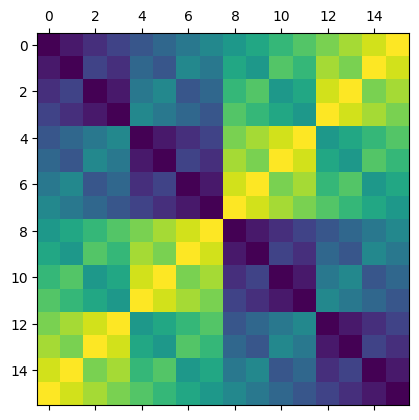

In [140]:
mat = generate_connection_matrix(16)
plt.matshow(mat)

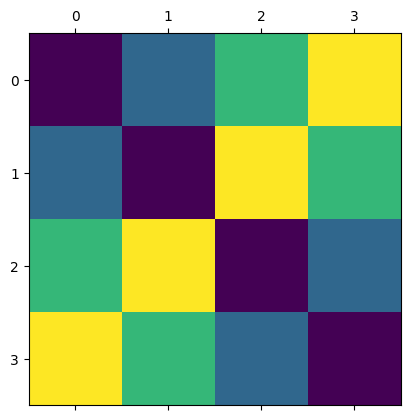

In [141]:
mat = generate_connection_matrix(4)
plt.matshow(mat)

In [66]:
for row in range(1,int(4/2)):
    row_size = 4 - 2*row -2
    allowed_nums = list(range(4))
    for num in mat[row][:row]:
        allowed_nums.remove(num)
    for num in mat[row][-row:]:
        allowed_nums.remove(num)
    for col in range(row + 1, row + 1 + row_size):
        pass

allowed_nums, mat

ValueError: list.remove(x): x not in list